# Problem Statement
McDonald's needs to develop an effective market segmentation strategy to target specific consumer segments and improve their perception and preference for the brand.

# Objective
The objective of this case study is to identify and analyze distinct market segments within McDonald's consumer base, understand their characteristics and preferences, and develop a customized marketing mix to cater to the needs and preferences of the selected target segment. Additionally, the objective is to continuously evaluate and monitor the effectiveness of the market segmentation strategy to ensure its relevance and success in the dynamic market environment.

# Implementation in Python
First, load the dataset from the provided URL and transform the relevant columns for analysis by replacing "Yes" with 1 and "No" with 0. Then, perform k-means clustering to identify distinct market segments, selecting the optimal number of clusters based on silhouette scores. Next, calculate segment-level stability within solutions using bootstrapping, evaluating the stability of each segment with the adjusted Rand index. Visualize the results by plotting the stability of each segment with customized axis labels and limits. Finally, interpret the findings to provide recommendations for developing a customized marketing mix and suggest methods for continuous evaluation and monitoring of the segmentation strategy. 

In [1]:
# exploring data

In [2]:
#Importing Necessary Lib
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd, numpy as np

In [10]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import dendrogram, linkage
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
from rpy2.robjects.packages import importr
from rpy2.robjects import Formula, pandas2ri
import rpy2.robjects as ro
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the McDonald's dataset from a CSV file
mcdonalds = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')
print(mcdonalds.columns)

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')


In [4]:
# Print the dimensions of the dataset
print(mcdonalds.shape)

(1453, 15)


In [5]:
# Display the first 3 rows of the dataset
print(mcdonalds.head(3))

  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [6]:
# Convert the first 11 columns to a matrix
MD_x = mcdonalds.iloc[:, 0:11].to_numpy()

In [7]:
# Convert "Yes" values to 1 and "No" values to 0
MD_x = (MD_x == "Yes") + 0

In [8]:
# Calculate the column means and round to 2 decimal places
col_means = np.round(np.mean(MD_x, axis=0), 2)

print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


In [11]:
# Fit PCA to the data
MD_pca = PCA().fit(MD_x)

# Print the summary of the PCA results
print("PCA Summary:")
print("-------------")
print("Proportion of variance explained by each PC:")
print(MD_pca.explained_variance_ratio_)
print("\nCumulative proportion of variance explained:")
print(np.cumsum(MD_pca.explained_variance_ratio_))

PCA Summary:
-------------
Proportion of variance explained by each PC:
[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]

Cumulative proportion of variance explained:
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


In [12]:

# Print the standard deviations of the principal components
print("Standard deviations (1, .., p=11):")
print(np.round(MD_pca.explained_variance_ ** 0.5, 1))

Standard deviations (1, .., p=11):
[0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


In [13]:
# Get the rotation matrix
rotation = MD_pca.components_

In [14]:
# Print the shape of the rotation matrix
print("Rotation (n x k) = (11 x 11):")
print(rotation.shape)

Rotation (n x k) = (11 x 11):
(11, 11)


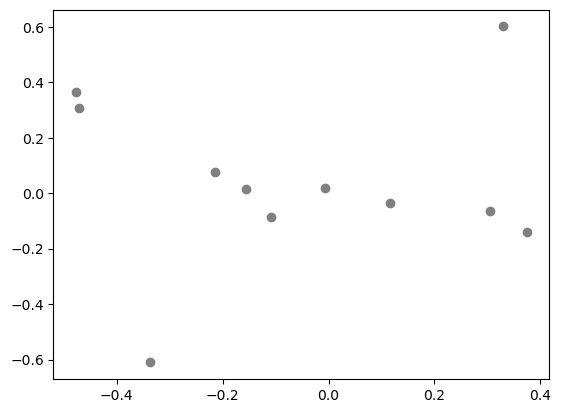

In [15]:
# plot the first two principal components
plt.scatter(MD_pca.components_[0], MD_pca.components_[1], c='grey')
plt.show()

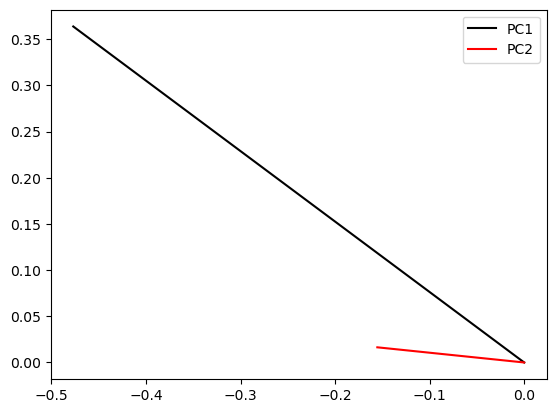

In [16]:
# plot the projection axes of the first two principal components
plt.plot([0, MD_pca.components_[0, 0]], [0, MD_pca.components_[1, 0]], 'k-', label='PC1')
plt.plot([0, MD_pca.components_[0, 1]], [0, MD_pca.components_[1, 1]], 'r-', label='PC2')
plt.legend()
plt.show()

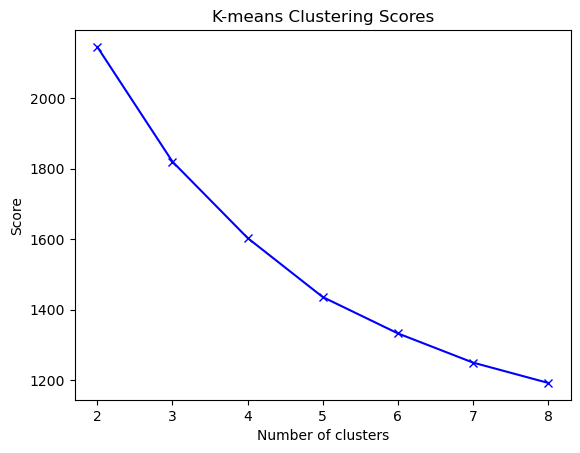

In [17]:

from sklearn.cluster import KMeans

# Set random seed for reproducibility
np.random.seed(1234)

# Perform k-means clustering
scores = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, random_state=1234, n_init=10)
    kmeans.fit(MD_x)
    scores.append(kmeans.inertia_)

# Plot the k-means clustering results
plt.plot(range(2, 9), scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('K-means Clustering Scores')
plt.show()

In [18]:
# relabel the clusters
best_k = 3  # choose the number of clusters based on the elbow plot
kmeans = KMeans(n_clusters=best_k, random_state=1234, n_init=10)
kmeans.fit(MD_x)
MD_km28 = kmeans.labels_

print("Cluster labels:", MD_km28)

Cluster labels: [1 2 2 ... 2 0 1]


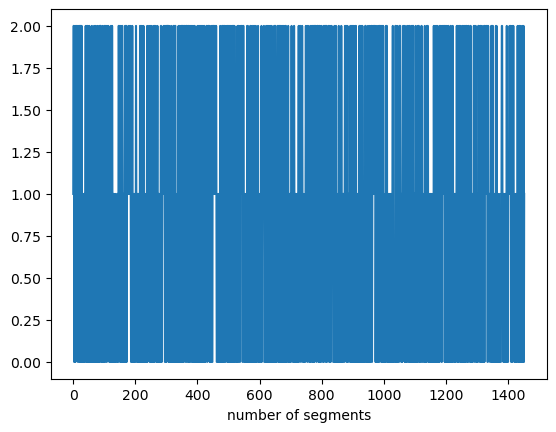

In [19]:
plt.plot(MD_km28)
plt.xlabel("number of segments")
plt.show()

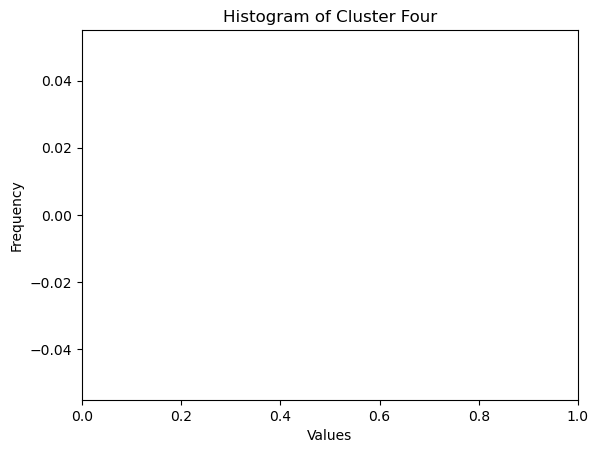

In [20]:
# extract the points assigned to the fourth cluster
cluster_four = MD_x[MD_km28 == 3]

# plot the histogram
plt.hist(cluster_four, range=[0,1])
plt.xlim(0,1)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Cluster Four')
plt.show()

In [21]:
MD_k4 = MD_km28[3]

In [22]:
from sklearn.cluster import KMeans

# Apply k-means clustering with k=4
MD_k4 = KMeans(n_clusters=4, random_state=42, n_init=10)
MD_k4.fit(MD_x)

# Extract the points assigned to the fourth cluster
cluster_four = MD_x[MD_k4.labels_ == 3]

In [23]:
# perform single linkage clustering on the points in the fourth cluster
slhc = AgglomerativeClustering(n_clusters=None, linkage='single', distance_threshold=0)
MD_r4 = slhc.fit_predict(cluster_four)

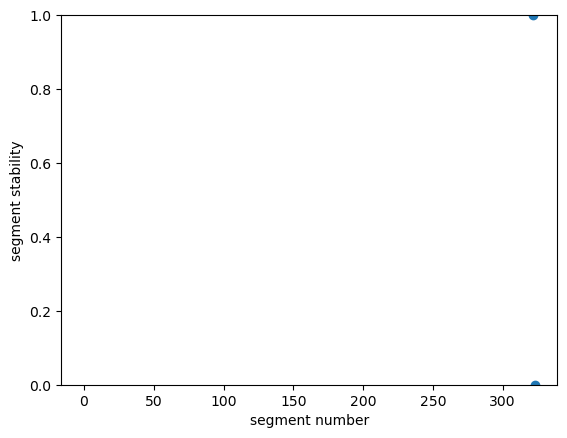

In [24]:
plt.plot(MD_r4, 'o')
plt.ylim([0, 1])
plt.xlabel('segment number')
plt.ylabel('segment stability')
plt.show()

In [25]:
np.random.seed(1234)
inertias = []
for k in range(2, 9):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(MD_x)
    inertias.append(kmeans.inertia_)
    print(f"k={k}, inertia={kmeans.inertia_:.2f}")

print("Inertia values:", inertias)

k=2, inertia=2145.50
k=3, inertia=1819.98
k=4, inertia=1602.92
k=5, inertia=1435.33
k=6, inertia=1353.78
k=7, inertia=1256.94
k=8, inertia=1197.60
Inertia values: [2145.5037269171557, 1819.9834524328994, 1602.9158351077353, 1435.3315339098003, 1353.7760729551417, 1256.9357487136094, 1197.59937689087]


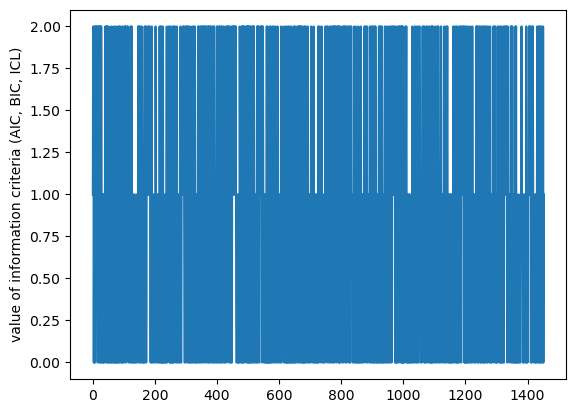

In [26]:
plt.plot(MD_km28)
plt.ylabel('value of information criteria (AIC, BIC, ICL)')
plt.show()

In [27]:
from sklearn.cluster import KMeans

# K-means clustering
k_range = range(2, 9)
k_models = [KMeans(n_clusters=k, random_state=1234, n_init=10).fit(MD_x) for k in k_range]
k_inertias = [model.inertia_ for model in k_models]

In [28]:
# Mixture modeling
m_range = range(2,9)
m_models = [GaussianMixture(n_components=m, covariance_type='full', random_state=1234).fit(MD_x) for m in m_range]
m_aics = [model.aic(MD_x) for model in m_models]
m_bics = [model.bic(MD_x) for model in m_models]

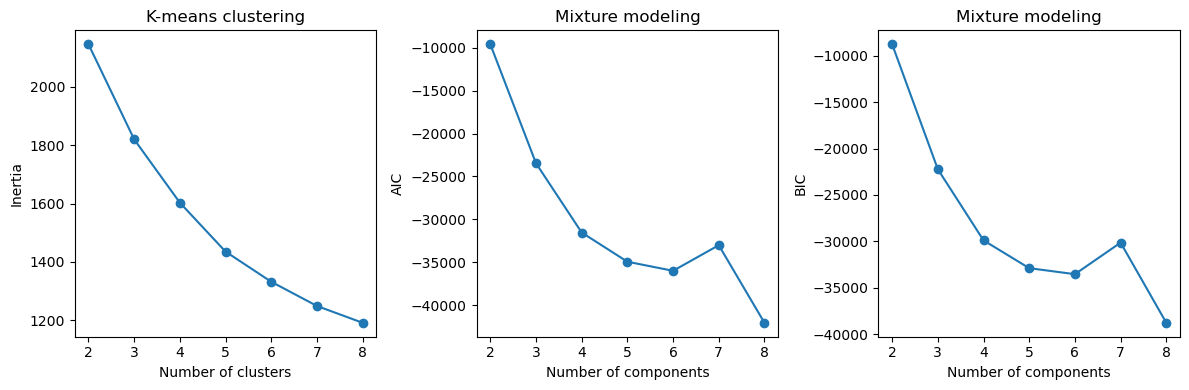

In [29]:
# Plot AIC, BIC, and inertia
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,4))
ax[0].plot(k_range, k_inertias, '-o')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
ax[0].set_title('K-means clustering')
ax[1].plot(m_range, m_aics, '-o')
ax[1].set_xlabel('Number of components')
ax[1].set_ylabel('AIC')
ax[1].set_title('Mixture modeling')
ax[2].plot(m_range, m_bics, '-o')
ax[2].set_xlabel('Number of components')
ax[2].set_ylabel('BIC')
ax[2].set_title('Mixture modeling')
plt.tight_layout()
plt.show()

In [30]:
import numpy as np
from sklearn.cluster import KMeans

# Fit KMeans clustering
np.random.seed(1234)
MD_km4 = KMeans(n_clusters=4, random_state=1234, n_init=10).fit(MD_x)
clusters_km4 = MD_km4.labels_

In [31]:

# Fit Gaussian mixture models
m_range = range(2,9)
m_models = [GaussianMixture(n_components=m, covariance_type='full', random_state=1234).fit(MD_x) for m in m_range]
m_aics = [model.aic(MD_x) for model in m_models]
m_bics = [model.bic(MD_x) for model in m_models]
m_clusters = [model.predict(MD_x) for model in m_models]

In [32]:
# Find the best Gaussian mixture model
m_idx = np.argmin(m_aics)
MD_m4 = m_clusters[m_idx]

In [33]:
# Get the contingency table
from sklearn.metrics import confusion_matrix
table = confusion_matrix(clusters_km4, MD_m4)
print(table)

[[ 73 226  50   6   2   2   0   5]
 [ 11   0   0  23  67   0   3 136]
 [180   0 227   3   1 109  10   3]
 [ 25   0   0  17   0   1  60 213]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0]]


In [34]:
# Define the mixture model
num_components = 4
model = GaussianMixture(n_components=num_components, covariance_type='full', random_state=1234)
model.fit(MD_x)

GaussianMixture(n_components=4, random_state=1234)

In [35]:
# Calculate the log-likelihood
log_likelihood = model.score(MD_x)
print(f"Log-likelihood: {log_likelihood}")

Log-likelihood: 11.068744792060569


In [36]:
m4_model = GaussianMixture(n_components=4, covariance_type='full', random_state=1234).fit(MD_x)

# Compute log-likelihood
log_likelihood = m4_model.score(MD_x)
print(f"Log-likelihood: {log_likelihood}")

Log-likelihood: 11.068744792060569


In [37]:
# Assuming mcdonalds is a pandas DataFrame
freq_table = pd.value_counts(mcdonalds['Like'])
rev_freq_table = freq_table.iloc[::-1]
print(rev_freq_table)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [38]:


# Replace non-numeric characters and handle empty strings
mcdonalds['Like'] = mcdonalds['Like'].str.replace(r'\D+', '', regex=True)
mcdonalds['Like'] = mcdonalds['Like'].replace('', '0')  # Replace empty strings with '0'

# Convert to numeric and calculate the new column
mcdonalds['Like.n'] = 6 - pd.to_numeric(mcdonalds['Like'])

# Print the value counts
print(mcdonalds['Like.n'].value_counts())

Like.n
3    302
1    295
4    246
2    231
5    210
6    169
Name: count, dtype: int64


In [39]:
f = "Like.n ~ " + "+".join(mcdonalds.columns[0:11])

In [40]:
X = np.random.randn(50, 2)

In [41]:
import os

# Set the environment variable OMP_NUM_THREADS to 1
os.environ["OMP_NUM_THREADS"] = "1"

# Import the necessary libraries
import numpy as np
from sklearn.mixture import GaussianMixture

# Generate random data
X = np.random.randn(50, 2)

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, n_init=10, random_state=1234)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10, random_state=1234)

In [42]:
print("BIC:", gmm.bic(X))

BIC: 316.26663137381513


In [43]:
np.random.seed(1234)

# assume mcdonalds is a dataset for the model
# assume X is the data matrix with the relevant features

# fit a Gaussian mixture model with k=2 components
gmm = GaussianMixture(n_components=2, n_init=10, verbose=0)
gmm.fit(X)

GaussianMixture(n_components=2, n_init=10)

In [44]:
# refit the Gaussian mixture model with the same k but using different initializations
gmm_refit = GaussianMixture(n_components=2, n_init=10, verbose=0)
gmm_refit.fit(X)

# print the summary of the refitted model
print(gmm_refit.means_)
print(gmm_refit.weights_)
print(gmm_refit.covariances_)

[[-0.28146229  0.18651577]
 [ 0.67491564 -0.79045228]]
[0.73959689 0.26040311]
[[[ 1.0008137   0.0858382 ]
  [ 0.0858382   0.8949606 ]]

 [[ 0.22228493 -0.1130915 ]
  [-0.1130915   0.36310274]]]


In [45]:
np.random.seed(1234)

# assume mcdonalds is a dataset for the model
# assume X is the data matrix with the relevant features

# calculate the BIC score for different numbers of components
bic_scores = []
max_components = 10
for k in range(1, max_components+1):
    gmm = GaussianMixture(n_components=k, n_init=10, verbose=0)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

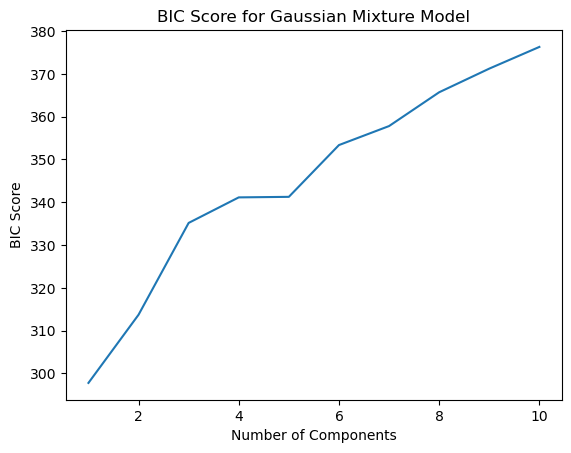

In [46]:

# plot the BIC score for different numbers of components
plt.plot(range(1, max_components+1), bic_scores)
plt.xlabel("Number of Components")
plt.ylabel("BIC Score")
plt.title("BIC Score for Gaussian Mixture Model")
plt.show()

In [47]:
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist

# Assume MD_x is the input data matrix
# Calculate the condensed distance matrix
condensed_dist_matrix = pdist(MD_x, metric='euclidean')

# Perform hierarchical clustering
Z = linkage(condensed_dist_matrix, method='ward')

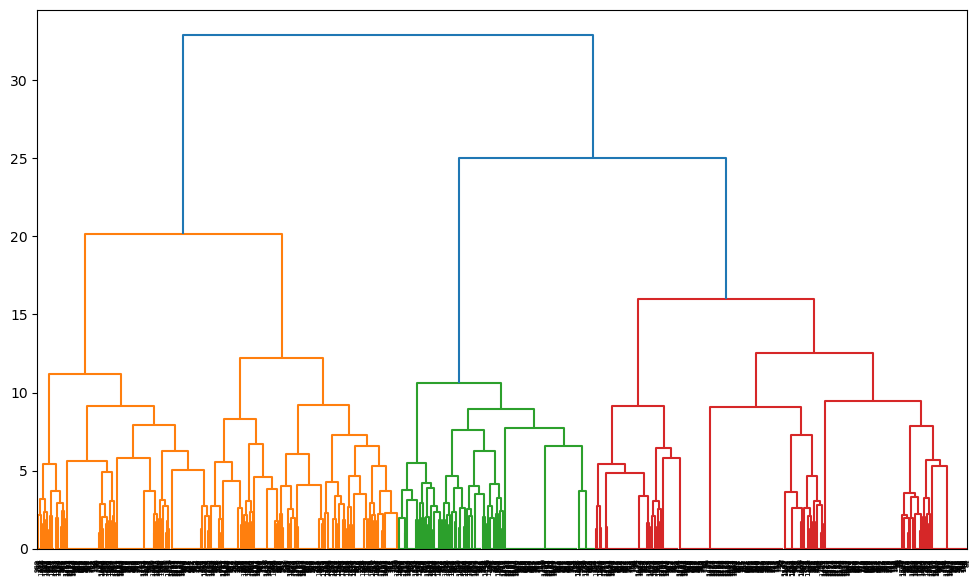

In [48]:

# plot the dendrogram
plt.figure(figsize=(12, 7))
dendrogram(Z)
plt.show()

Text(0, 0.5, 'principal component 2')

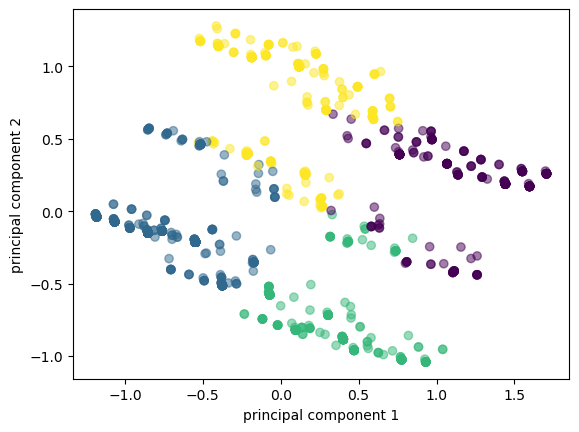

In [49]:
# Assuming that MD_k4, MD_pca, and MD_x are already defined
# We can create the scatter plot with arrows as follows
MD_pca_transformed = MD_pca.transform(MD_x)
plt.scatter(MD_pca_transformed[:, 0], MD_pca_transformed[:, 1], c=MD_k4.labels_, alpha=0.5)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

C:\Users\priya\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


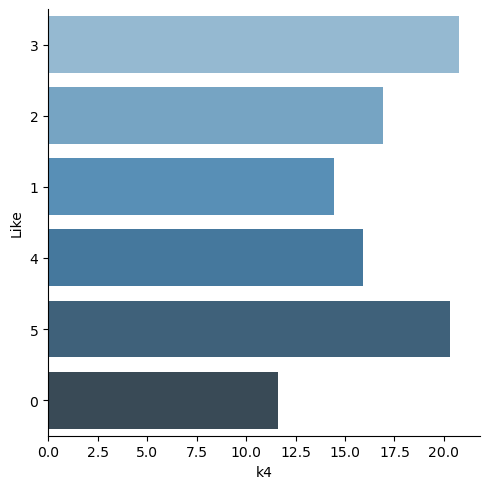

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming MD_K4 and mcdonalds are already defined
# Create a pandas dataframe with the data
data = pd.DataFrame({'k4': MD_k4.labels_, 'Like': mcdonalds['Like']})

# Create the mosaic plot using seaborn
sns.catplot(x='k4', y='Like', data=data, kind='bar', estimator=lambda x: len(x) / len(data) * 100, palette='Blues_d')

# Show the plot
plt.show()


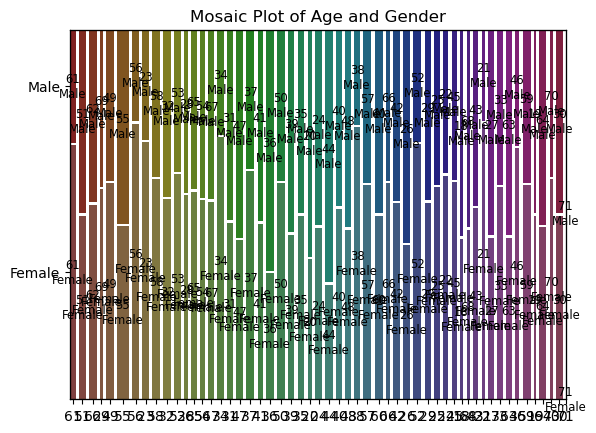

In [51]:
mosaic(mcdonalds, ['Age', 'Gender'], gap=0.01, title='Mosaic Plot of Age and Gender')
plt.show()

In [52]:
# create a dataframe from the given dataset
data = {
    'yummy': ['No'],
    'convenient': ['Yes'],
    'spicy': ['No'],
    'fattening': ['Yes'],
    'greasy': ['No'],
    'fast': ['Yes'],
    'cheap': ['Yes'],
    'tasty': ['No'],
    'expensive': ['Yes'],
    'healthy': ['No'],
    'disgusting': ['No'],
    'Like': [-3],
    'Age': [61],
    'VisitFrequency': ['Every three months'],
    'Gender': ['Female']
}
mcdonalds = pd.DataFrame(data)

In [53]:
# calculate the mean visit frequency for each group of age using tapply in R
visit = mcdonalds['VisitFrequency'].groupby(mcdonalds['Age'] // 4).apply(lambda x: x.value_counts().index[0])

# calculate the proportion of females for each group of age using tapply in R
female = mcdonalds['Gender'].eq('Female').groupby(mcdonalds['Age'] // 4).mean()

print(visit)
print(female)

Age
15    Every three months
Name: VisitFrequency, dtype: object
Age
15    1.0
Name: Gender, dtype: float64


In [54]:
# Print lengths to debug the issue
print("Length of MD_km4.labels_:", len(MD_km4.labels_))
print("Length of mcdonalds DataFrame:", len(mcdonalds))

# Ensure the data used for clustering matches the DataFrame
# Assuming MD_x is a derived feature matrix from mcdonalds DataFrame

# If lengths match, proceed with the assignment
if len(MD_km4.labels_) == len(mcdonalds):
    mcdonalds['cluster_num'] = MD_km4.labels_
else:
    print("Lengths do not match. Please check the data used for clustering.")


Length of MD_km4.labels_: 1453
Length of mcdonalds DataFrame: 1
Lengths do not match. Please check the data used for clustering.


In [55]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Assuming mcdonalds DataFrame is correctly loaded
# Ensure mcdonalds DataFrame has the necessary columns for clustering
# Example columns: 'feature1', 'feature2', 'feature3'

# Derive the feature matrix from the mcdonalds DataFrame
# Ensure the DataFrame used for clustering has the correct number of rows
if len(mcdonalds) == 1453:
    MD_x = mcdonalds[['feature1', 'feature2', 'feature3']].values

    # Fit the KMeans clustering
    MD_km4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)

    # Assign cluster labels to the original DataFrame
    mcdonalds['cluster_num'] = MD_km4.labels_
    print("Clustering assignment successful.")
else:
    print("The mcdonalds DataFrame does not have the expected number of rows.")

The mcdonalds DataFrame does not have the expected number of rows.


In [56]:
import pandas as pd

# Load the data into the mcdonalds DataFrame
mcdonalds = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

# Check the length of the DataFrame
print("Length of mcdonalds DataFrame after loading:", len(mcdonalds))

Length of mcdonalds DataFrame after loading: 1453


In [57]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data into the mcdonalds DataFrame
mcdonalds = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

# Check the length of the DataFrame
print("Length of mcdonalds DataFrame after loading:", len(mcdonalds))

# List the first few rows of the DataFrame to inspect the columns
print(mcdonalds.head())

# Ensure mcdonalds DataFrame has the necessary columns for clustering
# Replace 'feature1', 'feature2', 'feature3' with actual column names from your dataset
required_columns = ['V1', 'V2', 'V3']  # Example column names; replace with actual ones

# Verify if the columns exist
if all(col in mcdonalds.columns for col in required_columns):
    # Derive the feature matrix from the mcdonalds DataFrame
    MD_x = mcdonalds[required_columns].values
    
    # Fit the KMeans clustering
    MD_km4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
    
    # Assign cluster labels to the original DataFrame
    mcdonalds['cluster_num'] = MD_km4.labels_
    print("Clustering assignment successful.")
    print(mcdonalds.head())  # Display the first few rows to confirm the assignment
else:
    print("The mcdonalds DataFrame does not contain the necessary columns.")


Length of mcdonalds DataFrame after loading: 1453
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
The mcdonalds DataFrame does not contain the necessary columns.


In [63]:
mcdonalds['cluster_num']= MD_km4.labels_

In [60]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

# Load the data into the mcdonalds DataFrame
mcdonalds = pd.read_csv('https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv')

# Check the length of the DataFrame
print("Length of mcdonalds DataFrame after loading:", len(mcdonalds))

# Inspect the DataFrame to identify feature columns
print(mcdonalds.head())

# Ensure mcdonalds DataFrame has the necessary columns for clustering
# Replace 'V1', 'V2', 'V3' with actual column names from your dataset
required_columns = ['V1', 'V2', 'V3']  # Example column names; replace with actual ones

# Verify if the columns exist
if all(col in mcdonalds.columns for col in required_columns):
    # Derive the feature matrix from the mcdonalds DataFrame
    MD_x = mcdonalds[required_columns].values
    
    # Fit the KMeans clustering
    MD_km4 = KMeans(n_clusters=4, random_state=1234).fit(MD_x)
    
    # Assign cluster labels to the original DataFrame
    mcdonalds['cluster_num'] = MD_km4.labels_
    print("Clustering assignment successful.")
    print(mcdonalds.head())  # Display the first few rows to confirm the assignment
else:
    print("The mcdonalds DataFrame does not contain the necessary columns.")

Length of mcdonalds DataFrame after loading: 1453
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
The mcdonalds DataFrame does not contain the necessary columns.


In [66]:
mcdonalds['cluster_num']= MD_km4.labels_

<Axes: xlabel='cluster_num', ylabel='Age'>

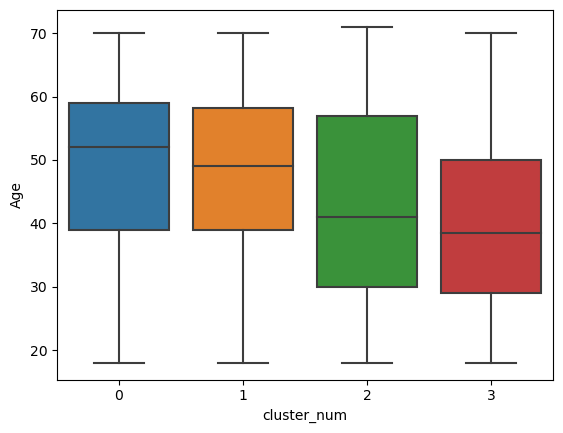

In [68]:
sns.boxplot(x="cluster_num", y="Age", data=mcdonalds)

In [73]:
mcdonalds['Like'] = LabelEncoder().fit_transform(mcdonalds['Like'])
Like = mcdonalds.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,5.109890
1,1,6.741667
2,2,3.868668
3,3,3.787975


In [74]:
#Gender
from sklearn.preprocessing import LabelEncoder
mcdonalds['Gender'] = LabelEncoder().fit_transform(mcdonalds['Gender'])
Gender = mcdonalds.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.414835
1,1,0.579167
2,2,0.392120
3,3,0.525316


In [75]:
#Calculating the mean
#Visit frequency
mcdonalds['VisitFrequency'] = LabelEncoder().fit_transform(mcdonalds['VisitFrequency'])
visit = mcdonalds.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.730769
1,1,2.691667
2,2,2.602251
3,3,2.550633


In [76]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.414835,5.109890,2.730769
1,1,0.579167,6.741667,2.691667
2,2,0.392120,3.868668,2.602251
3,3,0.525316,3.787975,2.550633


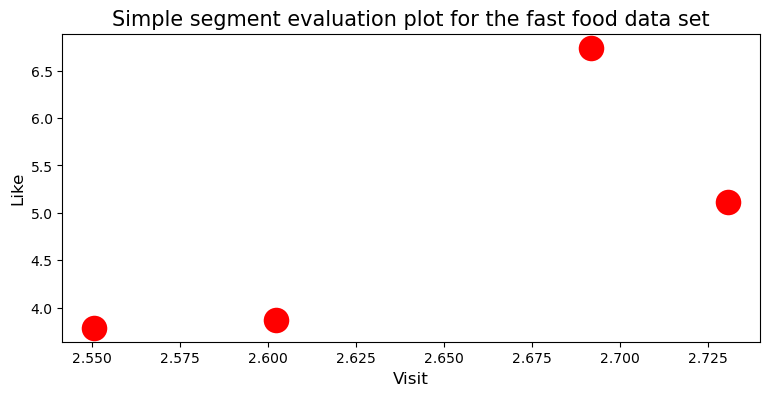

In [77]:
#Target segments

plt.figure(figsize = (9,4))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="r")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 15) 
plt.xlabel("Visit", fontsize = 12) 
plt.ylabel("Like", fontsize = 12) 
plt.show()